## Data: CBOE VIX 

In [110]:
import numpy as np
import pandas as pd

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt

In [112]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [113]:
import tensorflow as tf

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

## Data Manipulation

In [115]:
df = pd.read_csv("VIX_2011_2020.csv")

In [116]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-18,23.900000,24.850000,23.090000,24.440001,24.440001,0
1,2011-03-21,22.100000,22.160000,20.219999,20.610001,20.610001,0
2,2011-03-22,20.530001,20.590000,19.969999,20.209999,20.209999,0
3,2011-03-23,20.590000,21.049999,18.190001,19.170000,19.170000,0
4,2011-03-24,18.450001,18.990000,17.870001,18.000000,18.000000,0


In [117]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])  
df = df.set_index(['Date'], drop=True)  

In [118]:
df.rename(columns={'Adj Close': 'VIX'}, inplace=True) 
df.head(3)

,VIX
Date,
2011-03-18,24.440001
2011-03-21,20.610001
2011-03-22,20.209999


## Plot Time Series of VIX

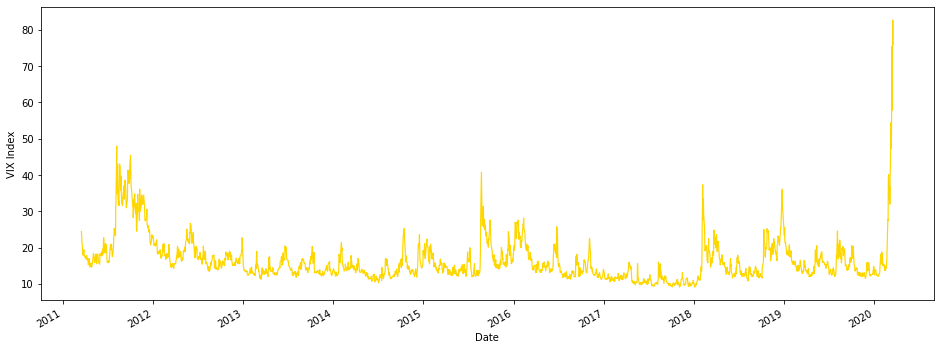

In [119]:
plt.figure(figsize=(16, 6))
plt.ylabel('VIX Index')
df['VIX'].plot(color = 'gold', linewidth = '1.2')

## Testing and Training Sets

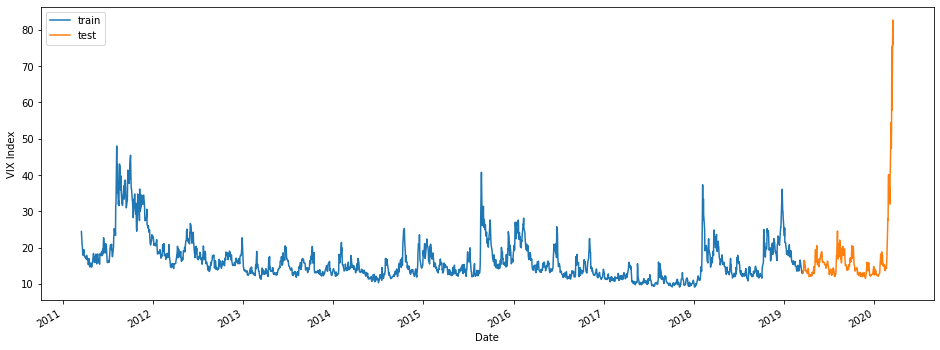

In [120]:
split_date = pd.Timestamp('2019-03-18')
df_VIX =  df['VIX']

train = df_VIX.loc[:split_date]
test = df_VIX.loc[split_date:]

plt.figure(figsize=(16, 6))
ax = train.plot()
test.plot(ax = ax)

plt.ylabel('VIX Index')
plt.legend(['train', 'test'])

In [121]:
# scale data to [-1，1].

scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(pd.DataFrame(train))
test_sc = scaler.fit_transform(pd.DataFrame(test))

In [122]:
X_train = train_sc[:-1] 
y_train = train_sc[1:]  

X_test = test_sc[:-1]
y_test = test_sc[1:]

## Simple NN

In [123]:
nn_model = Sequential()

nn_model.add(Dense(12, input_dim = 1, activation = 'relu'))

nn_model.add(Dense(1))

nn_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

early_stop = EarlyStopping(monitor = 'loss', patience = 2, verbose = 1)

history = nn_model.fit(X_train, y_train, epochs = 100, 
                       batch_size = 1, verbose = 1, callbacks = [early_stop], shuffle = False)

Epoch 1/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0094
Epoch 2/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0070
Epoch 3/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0069
Epoch 4/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0068
Epoch 5/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0068
Epoch 6/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0067
Epoch 7/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0067
Epoch 8/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0067
Epoch 9/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0067
Epoch 10/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0067
Epoch 11/100
2011/2011 [==============================] - 3s 2ms/step - loss: 0.0067
Epoch 12/100
2011/2011 [==============================] - 3s 2ms/step - lo

In [124]:
y_pred_train_nn = nn_model.predict(X_train)

y_pred_test_nn = nn_model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_pred_train_nn)))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.903
The R2 score on the Test set is:	0.859


## LSTM

In [125]:
X_train_1step = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_1step = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()

lstm_model.add(LSTM(7, input_shape = (1, X_train_1step.shape[1]), activation = 'relu', 
                    kernel_initializer = 'lecun_uniform', return_sequences = False))

lstm_model.add(Dense(1))

lstm_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

early_stop = EarlyStopping(monitor = 'loss', patience = 2, verbose = 1)

history_lstm_model = lstm_model.fit(X_train_1step, y_train, epochs = 100, 
                                    batch_size = 1, verbose = 1, shuffle = False, callbacks = [early_stop])

Epoch 1/100
2011/2011 [==============================] - 6s 3ms/step - loss: 0.0299
Epoch 2/100
2011/2011 [==============================] - 7s 4ms/step - loss: 0.0099
Epoch 3/100
2011/2011 [==============================] - 7s 4ms/step - loss: 0.0071
Epoch 4/100
2011/2011 [==============================] - 8s 4ms/step - loss: 0.0067
Epoch 5/100
2011/2011 [==============================] - 7s 3ms/step - loss: 0.0067
Epoch 6/100
2011/2011 [==============================] - 5s 3ms/step - loss: 0.0067
Epoch 7/100
2011/2011 [==============================] - 6s 3ms/step - loss: 0.0067
Epoch 8/100
2011/2011 [==============================] - 6s 3ms/step - loss: 0.0067
Epoch 9/100
2011/2011 [==============================] - 5s 3ms/step - loss: 0.0066
Epoch 10/100
2011/2011 [==============================] - 5s 3ms/step - loss: 0.0066
Epoch 11/100
2011/2011 [==============================] - 5s 3ms/step - loss: 0.0066
Epoch 12/100
2011/2011 [==============================] - 5s 3ms/step - lo

In [126]:
y_train_pred_lstm = lstm_model.predict(X_train_1step)

y_pred_test_lstm = lstm_model.predict(X_test_1step)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.912
The R2 score on the Test set is:	0.872


## Comparison of MSE of Two Models

In [127]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size = 1)

lstm_test_mse = lstm_model.evaluate(X_test_1step, y_test, batch_size = 1)

print('NN: %f'%nn_test_mse)

print('LSTM: %f'%lstm_test_mse)

252/252 [==============================] - 0s 2ms/step
NN: 0.009813
LSTM: 0.008929


## Prediction

### NN

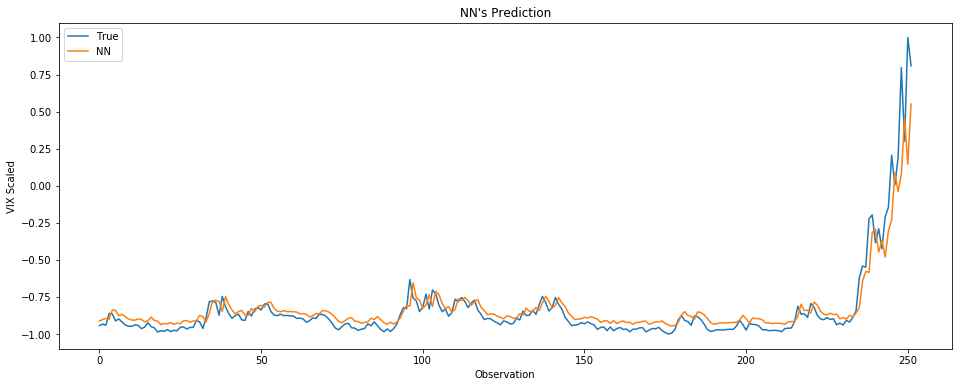

In [128]:
nn_y_pred_test = nn_model.predict(X_test)

plt.figure(figsize = (16, 6))

plt.plot(y_test, label = 'True')

plt.plot(y_pred_test_nn, label = 'NN')

plt.title("NN's Prediction")

plt.xlabel('Observation')

plt.ylabel('VIX Scaled')

plt.legend()

plt.show()

### LSTM

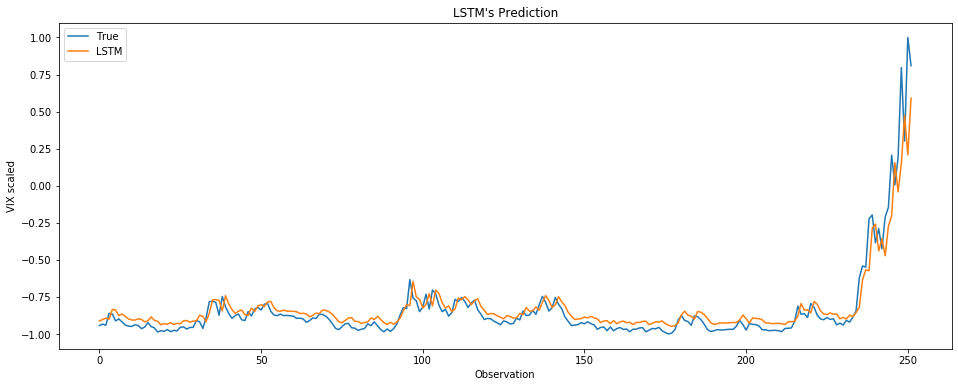

In [129]:
lstm_y_pred_test = lstm_model.predict(X_test_1step)

plt.figure(figsize=(16, 6))

plt.plot(y_test, label = 'True')

plt.plot(y_pred_test_lstm, label = 'LSTM')

plt.title("LSTM's Prediction")

plt.xlabel('Observation')

plt.ylabel('VIX scaled')

plt.legend()

plt.show()

### Put Together

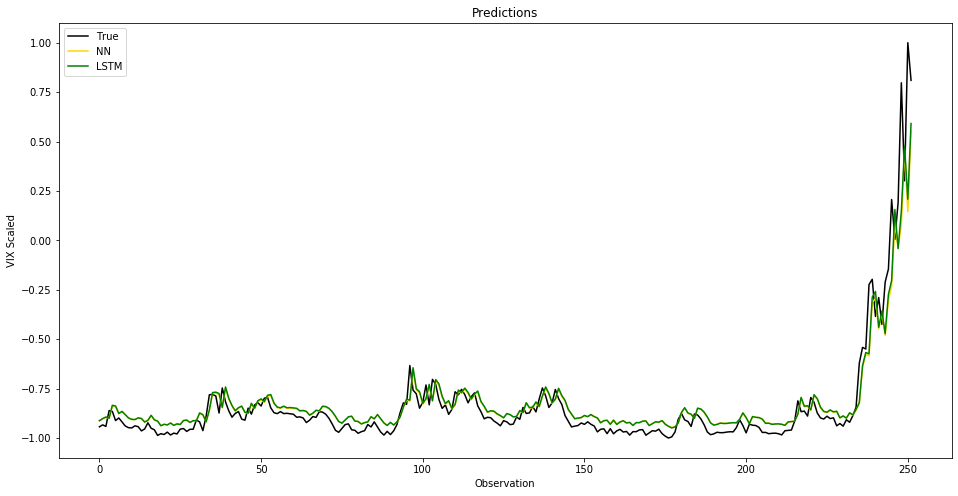

In [132]:
plt.figure(figsize = (16, 8))

plt.plot(y_test, label = 'True', color = 'black')

plt.plot(y_pred_test_nn, label = 'NN', color = 'gold')

plt.plot(y_pred_test_lstm, label = 'LSTM', color = 'green')

plt.title("Predictions")

plt.xlabel('Observation')

plt.ylabel('VIX Scaled')

plt.legend()

plt.show()